# Sentiment analysis is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows businesses to identify customer sentiment toward products, brands or services in online conversations and feedback.                    

### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import re   
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
from sklearn.feature_extraction.text import TfidfTransformer
tf=TfidfTransformer(smooth_idf=False)

### 2. Downloading the dataset

In [2]:
data=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

### Analyzing the data

In [3]:
data.head()                           # First 5 rows of the data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### The data consists of two columns. The review column is the text's left as a review by the customer . The liked column is the label which determines wheather the review is good or bad (1 for good and 0 for bad )

In [4]:
data.info()                    # info() tells that we have 1000 rows and the review column is object and liked an integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


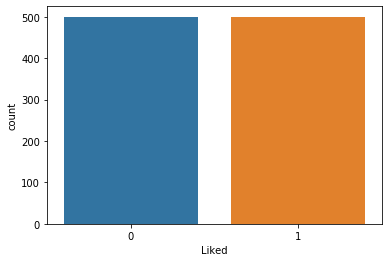

In [5]:
sns.countplot(x="Liked",data=data)

### From the above countplot we can analyze that the data is balanced one . An almost equal number of likes and dislikes. 

### 3. Cleaning data  (Pre-processing)

In [7]:
corpus=[]
for i in range(1000):

    review=re.sub('[^a-zA-Z]'," ", data["Review"][i])     # Keeps only the alphabetic charcters and removes all other characters
    review=review.lower()                    # Converting all words to lower case so that "good" and "Good" should'nt be confused as two different words
    review=review.split()                        # splitting each word of the review into a list of words
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # stemming the words to its root form and same time removing all the stopwords
    review=" ".join(review)                  # joining each word to form back one cleaned single review
    corpus.append(review)                    # appending each sentences back to form a list of cleaned review

In [8]:
corpus      # that is all the cleaned review

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

#####    can generate a word cloud for visualization of words with highest frequency

In [9]:
text=" ".join(w for w in corpus)
text

'wow love place crust good tasti textur nasti stop late may bank holiday rick steve recommend love select menu great price get angri want damn pho honeslti tast fresh potato like rubber could tell made ahead time kept warmer fri great great touch servic prompt would go back cashier care ever say still end wayyy overpr tri cape cod ravoli chicken cranberri mmmm disgust pretti sure human hair shock sign indic cash highli recommend waitress littl slow servic place worth time let alon vega like burritto blah food amaz servic also cute could care less interior beauti perform right red velvet cake ohhh stuff good never brought salad ask hole wall great mexican street taco friendli staff took hour get food tabl restaur food luke warm sever run around like total overwhelm worst salmon sashimi also combo like burger fri beer decent deal like final blow found place accid could happier seem like good quick place grab bite familiar pub food favor look elsewher overal like place lot redeem qualiti 

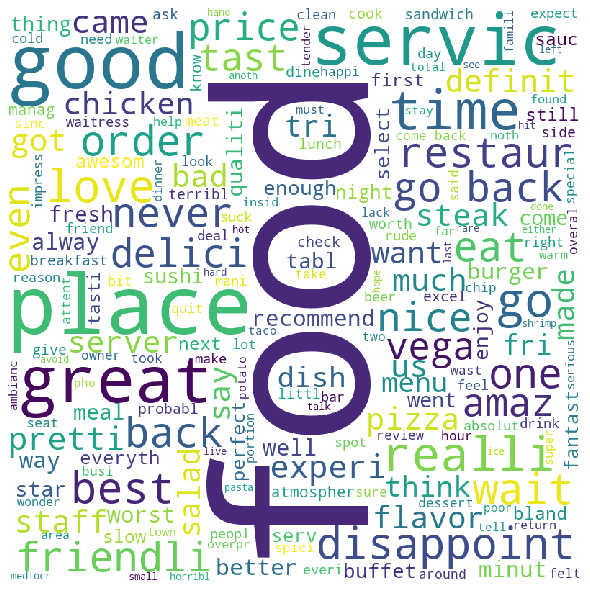

In [10]:

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = STOPWORDS, min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Bag of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()   #max_feature to use when too much words

In [12]:
X=cv.fit_transform(corpus).toarray()

In [13]:
X.shape

(1000, 1565)

# Training model

In [14]:
Y=data.iloc[:,1]     # traget variable

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_pred=classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

In [20]:
cm


array([[60, 45],
       [17, 78]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_test,y_pred)

0.69